# 목적

다양한 head의 결과를 분석하고 최적의 조합을 찾아내는 것

## Import libraries

In [20]:
import os 
import pandas as pd
import matplotlib.pyplot as plt

## Load results

In [12]:
final_df = pd.read_csv('final_df.csv')
col_names = final_df.columns[2:].tolist()
final_df.head()

,Id,answer,swin_2021_org,swin_2021_sr,swin_2021_qr,swin_2021_by,swin_2025_org,swin_2025_sr,swin_2025_qr,swin_2025_by,cait_2026_org,cait_2026_sr,cait_2026_qr,cait_2026_by
0,0007de18844b0dbbb5e1f607da0606e0,63,50.264412,53.662601,50.595634,50.653679,50.286007,49.594284,48.594933,49.760120,50.561424,55.720238,53.891541,51.404709
1,0009c66b9439883ba2750fb825e1d7db,42,46.371140,45.153790,45.977993,46.311607,49.358906,47.186104,47.708866,47.533344,40.595482,44.491241,45.055130,43.156956
2,0013fd999caf9a3efe1352ca1b0d937e,28,39.563145,38.412083,38.659264,38.445034,43.065102,44.190395,40.191193,41.364395,31.726074,35.653496,32.967209,36.313225
3,0018df346ac9c1d8413cfcc888ca8246,15,65.116127,67.511353,63.865299,69.256470,61.866005,61.852154,55.134415,63.002247,55.734383,58.127403,58.429310,54.110924
4,001dc955e10590d3ca4673f034feeef2,72,47.531494,48.084698,48.415077,48.873051,44.917740,48.183144,46.163277,49.473991,46.865158,51.678322,51.090775,48.789375


## Results Visualization

Text(0.5, 1.0, 'y-axis : pred, x-axis : Id')

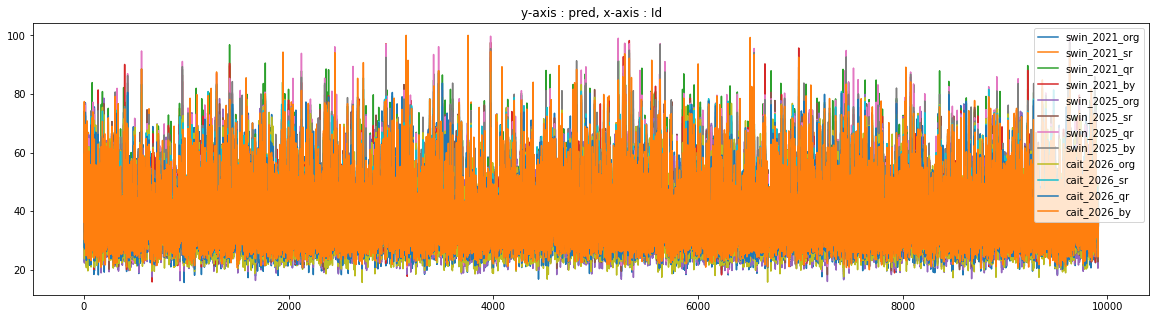

In [21]:
final_df[col_names].plot(figsize=(20,5))
plt.title('y-axis : pred, x-axis : Id')

array([[<AxesSubplot:title={'center':'answer'}>,
        <AxesSubplot:title={'center':'swin_2021_org'}>,
        <AxesSubplot:title={'center':'swin_2021_sr'}>,
        <AxesSubplot:title={'center':'swin_2021_qr'}>],
       [<AxesSubplot:title={'center':'swin_2021_by'}>,
        <AxesSubplot:title={'center':'swin_2025_org'}>,
        <AxesSubplot:title={'center':'swin_2025_sr'}>,
        <AxesSubplot:title={'center':'swin_2025_qr'}>],
       [<AxesSubplot:title={'center':'swin_2025_by'}>,
        <AxesSubplot:title={'center':'cait_2026_org'}>,
        <AxesSubplot:title={'center':'cait_2026_sr'}>,
        <AxesSubplot:title={'center':'cait_2026_qr'}>],
       [<AxesSubplot:title={'center':'cait_2026_by'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

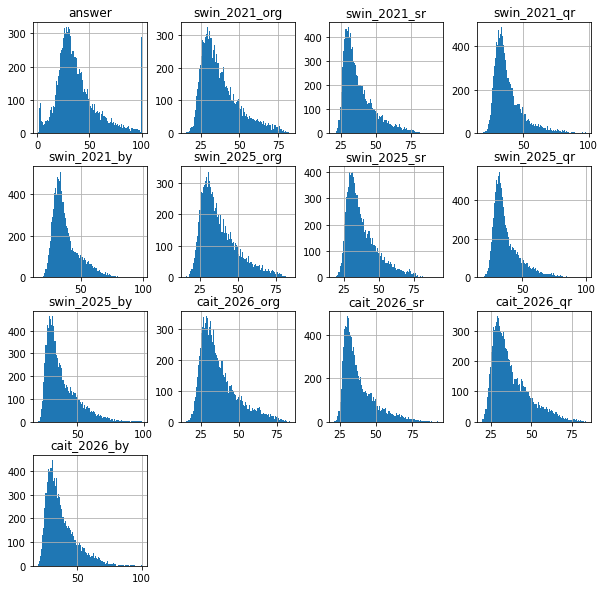

In [32]:
final_df.hist(bins=100, figsize=(10,10))

## Performance analysis

In [35]:
from sklearn.metrics import mean_squared_error

for col in col_names:
    pred = final_df[col]
    answer = final_df['answer']
    score = mean_squared_error(answer, pred)**0.5
    print(f'{col} score : {score:.4f}')
    

swin_2021_org score : 17.4244
swin_2021_sr score : 17.3266
swin_2021_qr score : 17.2867
swin_2021_by score : 17.2495
swin_2025_org score : 17.4488
swin_2025_sr score : 17.3347
swin_2025_qr score : 17.3330
swin_2025_by score : 17.2849
cait_2026_org score : 17.5949
cait_2026_sr score : 17.3882
cait_2026_qr score : 17.4388
cait_2026_by score : 17.3468


In [43]:
# Naive ensembel score

from itertools import combinations
import numpy as np
debug = True
cv_min_score = 10e+2

for i in range(1, len(col_names)+1):
    
    comb = list(combinations(col_names, i))
    
    for c in comb:
        ensemble_predicts = np.zeros(final_df.shape[0])
        for item in c:
            ensemble_predicts += final_df[item]
        ensemble_predicts = ensemble_predicts/len(c)
        ens_score = mean_squared_error(final_df['answer'],ensemble_predicts)**0.5
        if ens_score < cv_min_score:
            min_comb = c
            cv_min_score = ens_score
        if debug:
            print(c)
            print(f'cv score : {ens_score}')
            print('------------')
            
print(f'min combination : {min_comb}, score : {cv_min_score}')

('swin_2021_org',)
cv score : 17.42442557159008
------------
('swin_2021_sr',)
cv score : 17.32656759783202
------------
('swin_2021_qr',)
cv score : 17.286716458722502
------------
('swin_2021_by',)
cv score : 17.249492257178503
------------
('swin_2025_org',)
cv score : 17.44878050844522
------------
('swin_2025_sr',)
cv score : 17.334664530218674
------------
('swin_2025_qr',)
cv score : 17.33304602560572
------------
('swin_2025_by',)
cv score : 17.284868180078174
------------
('cait_2026_org',)
cv score : 17.594875944867937
------------
('cait_2026_sr',)
cv score : 17.38819389315751
------------
('cait_2026_qr',)
cv score : 17.43882798079086
------------
('cait_2026_by',)
cv score : 17.346831372787225
------------
('swin_2021_org', 'swin_2021_sr')
cv score : 17.332002148138017
------------
('swin_2021_org', 'swin_2021_qr')
cv score : 17.24128284686241
------------
('swin_2021_org', 'swin_2021_by')
cv score : 17.24515165656062
------------
('swin_2021_org', 'swin_2025_org')
cv scor